# Importing Libraries

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set_theme()

# Data Reading

In [141]:
path= "kaggle_survey_2017_2021.csv"
df = pd.read_csv(path)
df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_16364\869649977.py:2: DtypeWarning: Columns (0,1,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Inspection

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB


In [143]:
df.duplicated().sum()

4456

In [144]:
df.isna().sum()

-                                           0
Time from Start to Finish (seconds)     16716
Q1                                        445
Q2                                         95
Q3                                        121
                                        ...  
Q38_B_Part_6                           105015
Q38_B_Part_7                           105084
Q38_B_Part_9                           105116
Q38_B_Part_11                          106301
Q38_B_OTHER                            105673
Length: 293, dtype: int64

In [145]:
df.describe()

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
count,106302,89586,105857,106207,106181,103319,99088,92786,65943,20885,...,2212,2761,1128,1022,7439,1287,1218,1186,1,629
unique,7,12778,12,10,78,13,36,21,2,2,...,2,2,2,2,2,2,2,2,1,2
top,2021,394,25-29,Male,India,Masterâ€™s degree,Student,3-5 years,Python,R,...,Neptune.ai,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Domino Model Monitor,"In the next 2 years, do you hope to become mor...",Other
freq,23926,105,23748,49178,25192,37395,21242,15995,65942,20884,...,2211,2760,1127,1021,7438,1286,1217,1185,1,628


# Some Data Cleaning

In [146]:
df = df.iloc[1:].reset_index(drop=True)
df.head()

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
# Renaming columns for easy using
df.columns = df.columns.str.lower()
df.head()

,-,time from start to finish (seconds),q1,q2,q3,q4,q5,q6,q7_part_1,q7_part_2,...,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_9,q38_b_part_11,q38_b_other
0,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
df.columns = df.columns.str.strip()
df.head()

,-,time from start to finish (seconds),q1,q2,q3,q4,q5,q6,q7_part_1,q7_part_2,...,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_9,q38_b_part_11,q38_b_other
0,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [150]:
df['q2'] = df['q2'].str.lower().str.strip()

def clean_gender(g):
    if g in ['man', 'male']:
        return 'Male'
    elif g in ['woman', 'female']:
        return 'Female'
    else:
       return 'Other'  

df['Gender'] = df['q2'].apply(clean_gender)

# Handling Missing Values


* **If col has missing < 5 % : Drop Rows with missing values**
* **If col has missing > 40 % : Drop the column**
* **If col has missing (5-40 %): Filling**

In [151]:
# Check Missing again
df.isna().mean().round(3)

-                                      0.000
time from start to finish (seconds)    0.121
q1                                     0.003
q2                                     0.001
q3                                     0.001
                                       ...  
q38_b_part_7                           0.988
q38_b_part_9                           0.988
q38_b_part_11                          1.000
q38_b_other                            0.994
Gender                                 0.000
Length: 294, dtype: float64

In [152]:
missing_percent = df.isnull().mean() * 100

In [153]:
# 1. Drop columns with > 40% missing values
cols_to_drop = missing_percent[missing_percent > 40].index
df.drop(columns=cols_to_drop, inplace=True)

In [154]:
# 2. Drop rows with missing values in columns with < 5% missing
cols_to_dropna = missing_percent[(missing_percent > 0) & (missing_percent < 5)].index
df.dropna(subset=cols_to_dropna, inplace=True)

In [155]:
# 3. Fill missing values in columns with 5–40% missing
cols_to_fill = missing_percent[(missing_percent >= 5) & (missing_percent <= 40)].index
for col in cols_to_fill:
    if df[col].dtype == 'object':
        df[col].fillna('Unknown', inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True) 

C:\Users\PC\AppData\Local\Temp\ipykernel_16364\3481544494.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [156]:
df.isna().sum()

-                                      0
time from start to finish (seconds)    0
q1                                     0
q2                                     0
q3                                     0
q4                                     0
q5                                     0
q6                                     0
q7_part_1                              0
q8                                     0
q15                                    0
Gender                                 0
dtype: int64

In [157]:
df.head()

,-,time from start to finish (seconds),q1,q2,q3,q4,q5,q6,q7_part_1,q8,q15,Gender
0,2021,910,50-54,man,India,Bachelorâ€™s degree,Other,5-10 years,Python,Python,5-10 years,Male
1,2021,784,50-54,man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,Unknown,Python,Under 1 year,Male
2,2021,924,22-24,man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,Python,I do not use machine learning methods,Male
3,2021,575,45-49,man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Python,5-10 years,Male
4,2021,781,45-49,man,India,Doctoral degree,Other,< 1 years,Python,Python,10-20 years,Male


# Categorical Handling

In [158]:
le = LabelEncoder()
df['Country_Encoded'] = le.fit_transform(df['q3'])
df['Gender_Encoded'] = le.fit_transform(df['q2'])

In [159]:
df['q4'] = df['q4'].str.replace("â€™", "'", regex=False)  # fix special apostrophe

In [160]:
education_mapping = {
    'I did not complete any formal education past high school': 0,
    'No formal education past high school': 0,
    "Some college/university study without earning a bachelor's degree": 1,
    "Bachelor's degree": 2,
    "Master's degree": 3,
    'Professional degree': 4,
    'Professional doctorate': 5,
    'Doctoral degree': 6,
    'I prefer not to answer': np.nan
}

In [161]:
df['Education_Level'] = df['q4'].replace(education_mapping)

C:\Users\PC\AppData\Local\Temp\ipykernel_16364\2783267623.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education_Level'] = df['q4'].replace(education_mapping)


In [162]:
df.head()

,-,time from start to finish (seconds),q1,q2,q3,q4,q5,q6,q7_part_1,q8,q15,Gender,Country_Encoded,Gender_Encoded,Education_Level
0,2021,910,50-54,man,India,Bachelor's degree,Other,5-10 years,Python,Python,5-10 years,Male,26,3,2.0
1,2021,784,50-54,man,Indonesia,Master's degree,Program/Project Manager,20+ years,Unknown,Python,Under 1 year,Male,27,3,3.0
2,2021,924,22-24,man,Pakistan,Master's degree,Software Engineer,1-3 years,Python,Python,I do not use machine learning methods,Male,46,3,3.0
3,2021,575,45-49,man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Python,5-10 years,Male,38,3,6.0
4,2021,781,45-49,man,India,Doctoral degree,Other,< 1 years,Python,Python,10-20 years,Male,26,3,6.0


# Extracting Insights

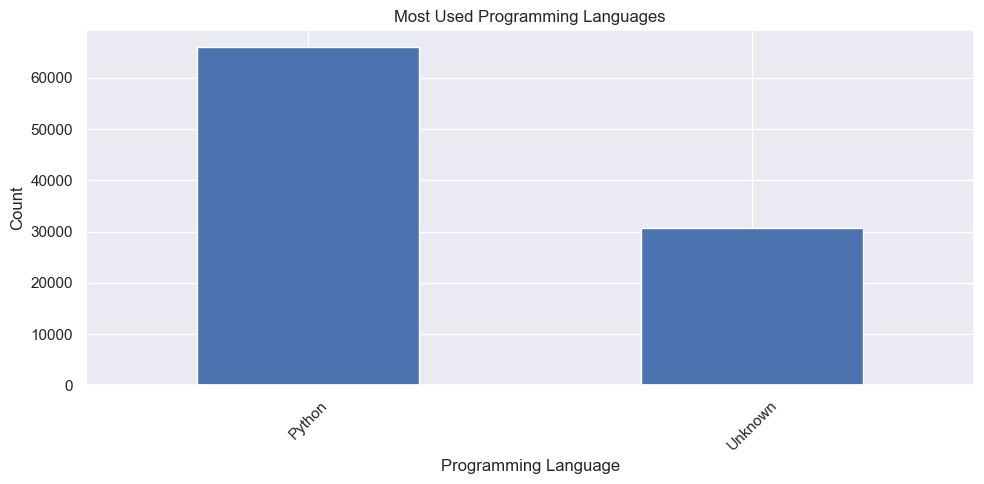

In [163]:
df['q7_part_1'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('Most Used Programming Languages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


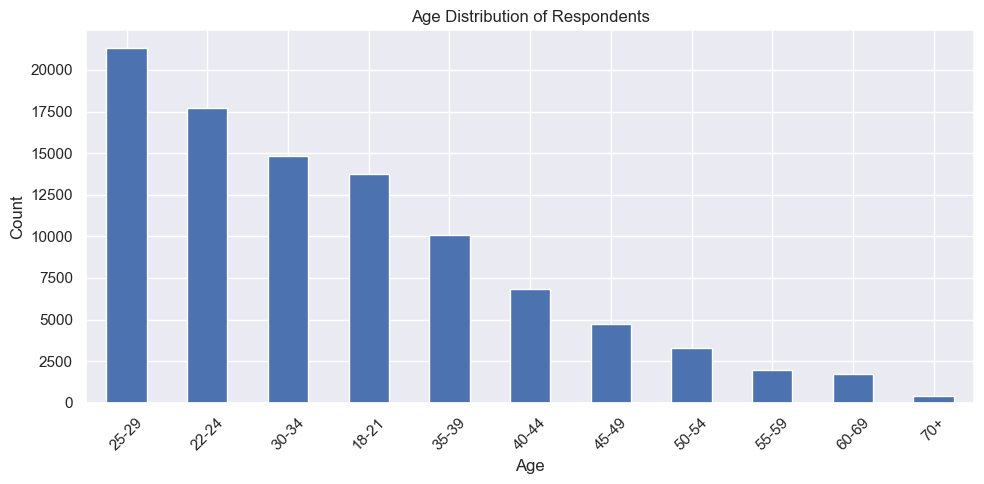

In [164]:
df['q1'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

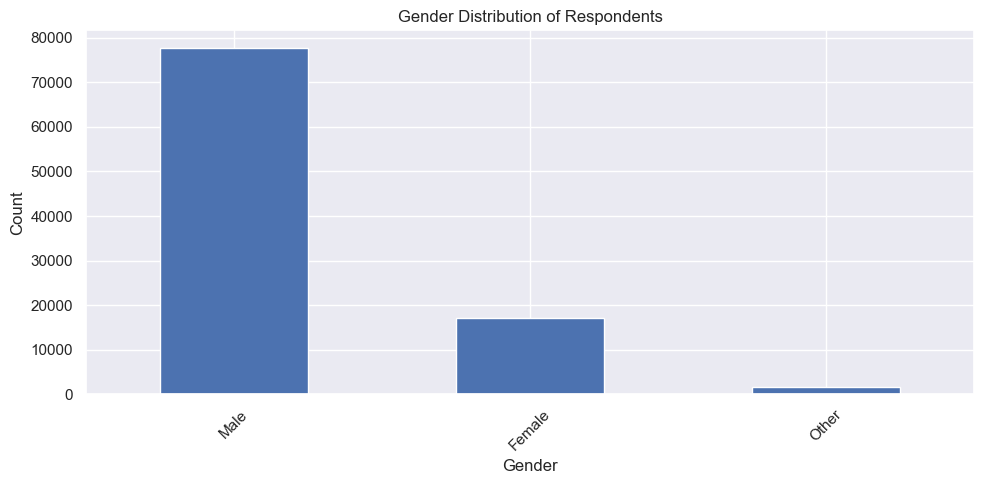

In [165]:
df['Gender'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [166]:
df.groupby('q4')['q6'].value_counts(normalize=True)

q4                                                                 q6                                                  
Bachelor's degree                                                  < 1 years                                               0.182190
                                                                   1-2 years                                               0.163153
                                                                   3-5 years                                               0.153001
                                                                   1-3 years                                               0.116414
                                                                   Unknown                                                 0.083914
                                                                                                                             ...   
Some college/university study without earning a bachelor's degree  I don't write code to

In [167]:
df['q3'].value_counts().head(10)

q3
India                                                   23100
United States of America                                12448
Other                                                    5201
China                                                    3266
Brazil                                                   3135
Russia                                                   3107
Japan                                                    2890
Germany                                                  2383
United Kingdom of Great Britain and Northern Ireland     2191
United States                                            1987
Name: count, dtype: int64

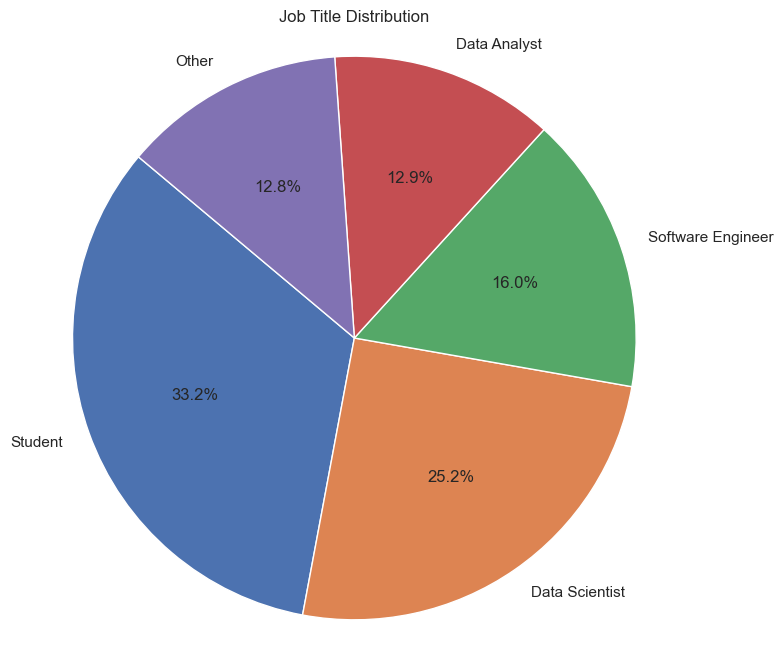

In [ ]:
job_counts = df['q5'].value_counts().head(5)  # top 5 titles
plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Title Distribution')
plt.axis('equal')  # Equal aspect ratio makes pie chart circular
plt.show()

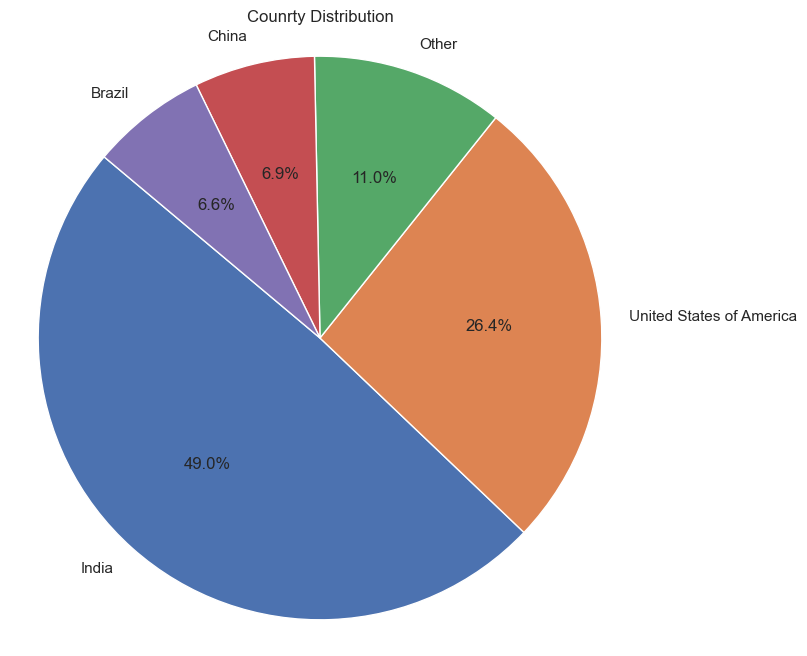

In [172]:
top_country = df['q3'].value_counts().head(5)  
plt.figure(figsize=(8, 8))
plt.pie(top_country, labels=top_country.index, autopct='%1.1f%%', startangle=140)
plt.title('Counrty Distribution')
plt.axis('equal')
plt.show()